In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
os.getcwd()

'C:\\Users\\DELL\\Unsupervised'

In [4]:
data=pd.read_csv("C:\\Users\\DELL\\Unsupervised/Mall_customers.csv")
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [5]:
data.shape

(200, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [9]:
data.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [10]:
data.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
w=('CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)')
for i in w:
    data[i]=le.fit_transform(data[i])
data

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,1,1,0,30
1,1,1,3,0,67
2,2,0,2,1,4
3,3,0,5,1,64
4,4,0,13,2,31
...,...,...,...,...,...
195,195,0,17,61,66
196,196,0,27,62,23
197,197,1,14,62,61
198,198,1,14,63,16


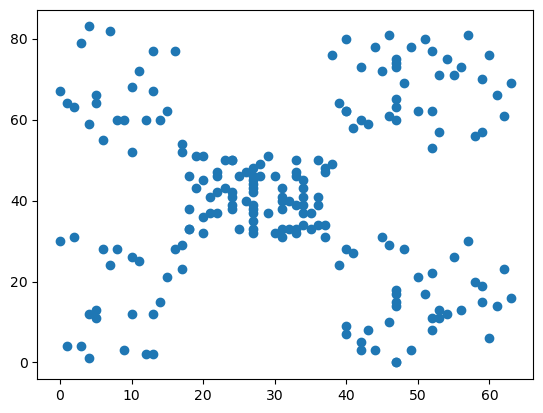

In [13]:
plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"])


In [16]:
x=data.loc[:,["Annual Income (k$)","Spending Score (1-100)"]].values
x.shape

(200, 2)

In [22]:
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=2)
hj=nn.fit(x)
distances,indices=hj.kneighbors(x)
distances
indices

array([[  0,   4],
       [  1,   3],
       [  2,   6],
       [  3,   5],
       [  4,   0],
       [  5,   3],
       [  6,   2],
       [  7,  11],
       [  8,   6],
       [  9,  21],
       [ 10,  12],
       [ 11,  19],
       [ 12,  10],
       [ 13,  15],
       [ 14,  10],
       [ 15,  13],
       [ 16,  20],
       [ 17,   9],
       [ 18,  26],
       [ 19,  11],
       [ 20,  16],
       [ 21,  23],
       [ 22,  30],
       [ 23,  21],
       [ 24,  34],
       [ 25,  35],
       [ 26,  28],
       [ 27,  17],
       [ 28,  26],
       [ 29,  25],
       [ 30,  32],
       [ 31,  37],
       [ 32,  30],
       [ 33,  41],
       [ 34,  24],
       [ 35,  25],
       [ 36,  34],
       [ 37,  31],
       [ 38,  44],
       [ 39,  37],
       [ 40,  42],
       [ 41,  33],
       [ 42,  40],
       [ 43,  45],
       [ 44,  38],
       [ 45,  43],
       [ 46,  52],
       [ 47,  54],
       [ 49,  48],
       [ 49,  48],
       [ 50,  52],
       [ 51,  53],
       [ 52,

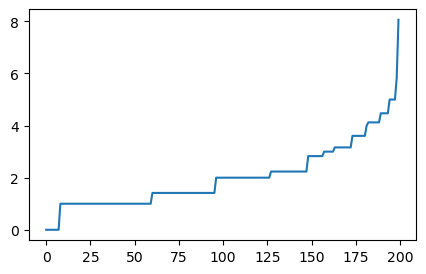

In [37]:
distances=np.sort(distances,axis=0)
distances=distances[:,]
plt.rcParams["figure.figsize"]=(5,3)
plt.plot(distances)
plt.show()

In [32]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=8,min_samples=4).fit(x)
db=dbscan.labels_
db

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,
        0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,  1,  0,
        1,  0,  1,  0,  1, -1,  1,  0,  1,  0,  1,  0,  1], dtype=int64)

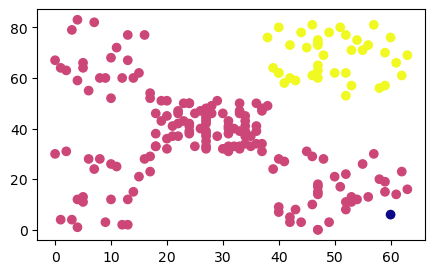

In [33]:
plt.scatter(x[:,0],x[:,1],c=db,cmap="plasma")
plt.show()